In [225]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
#import statsmodels.formula.api as smf
import statsmodels as smf

%matplotlib inline
plt.style.use('seaborn-white')

pd.set_option('display.max_columns',100)

In [226]:
# Setup  - To support both python 2 and python 3
# First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, 
# ensure MatplotLib plots figures inline and prepare a function to save the figures:

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [227]:
df = pd.read_csv('/Users/Jai/Desktop/All_files/MS_in_DS/Machine_learning/Module4/Company_bankruptcy/data.csv')

In [228]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Check for missing Values

In [230]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [231]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

#no missing values in the data

Total number of rows with missing values is  0
since it is only 0 percent of the entire dataset the rows with missing values are excluded.


Rename target variable Bankrupt? to Bankrupt

In [232]:
df.rename(columns={'Bankrupt?': 'Bankrupt'}, inplace=True)


Exploratory Analysis

In [233]:
#Count of unique values in target variable
df.Bankrupt.value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

<AxesSubplot:xlabel='Bankrupt', ylabel='count'>

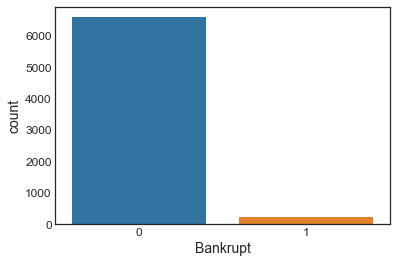

In [234]:
import seaborn as sn
sn.countplot(x='Bankrupt',data=df)

Splot the data into X and y. X = independent variables, y = dependent variables

In [235]:
X=df.iloc[:,1:]
y=df.iloc[:,:-95]

In [236]:
X.head()
y

,Bankrupt
0,1
1,1
2,1
3,1
4,1
...,...
6814,0
6815,0
6816,0
6817,0


In [237]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Use mutual info classif function to information on how much each feature contributes to the target

Text(0, 0.5, 'Mutual Information')

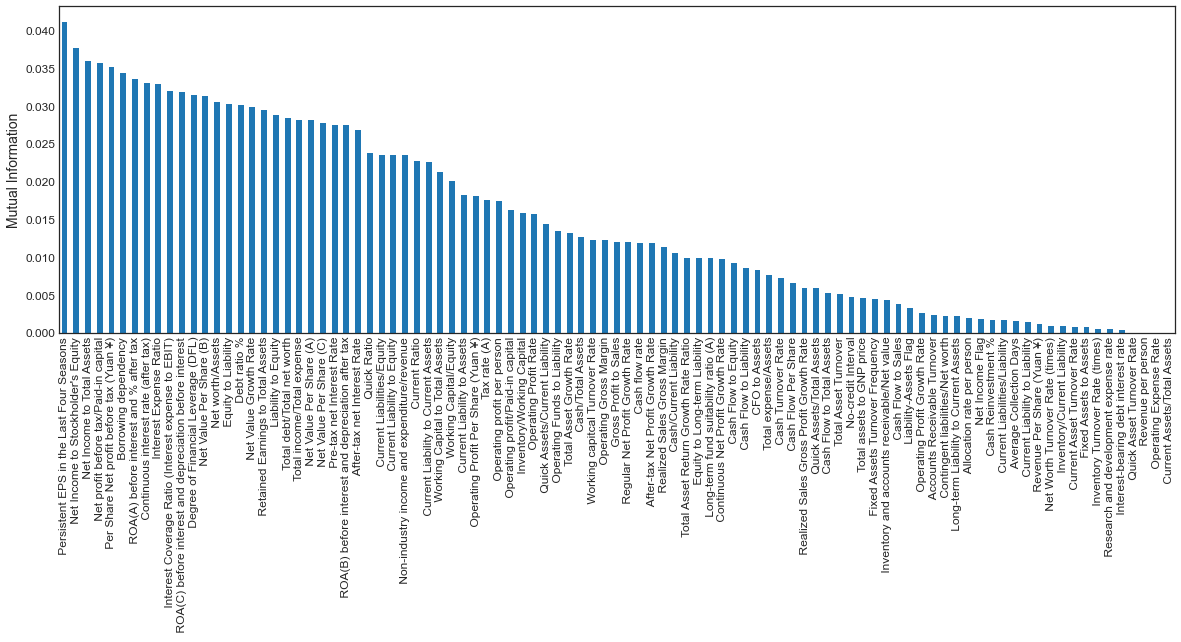

In [238]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

In [239]:
from sklearn.feature_selection import SelectKBest
# select features
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]

Index([' ROA(A) before interest and % after tax',
       ' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Interest Expense Ratio',
       ' Borrowing dependency', ' Net profit before tax/Paid-in capital',
       ' Net Income to Total Assets', ' Net Income to Stockholder's Equity',
       ' Interest Coverage Ratio (Interest expense to EBIT)'],
      dtype='object')

In [240]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [241]:
X_train.shape,X_test.shape

((5455, 10), (1364, 10))

Feature Scaling

In [242]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
X_train_MM = MM.fit_transform(X_train)
X_test_MM = MM.transform(X_test)

In [243]:
X_train_MM

array([[0.5428478 , 0.78159285, 0.15462754, ..., 0.81527104, 0.84058021,
        0.76888644],
       [0.5623092 , 0.78163664, 0.15770573, ..., 0.82503886, 0.84133887,
        0.76717355],
       [0.56100087, 0.78169152, 0.16283604, ..., 0.82384529, 0.8409691 ,
        0.76729413],
       ...,
       [0.56220017, 0.78161545, 0.15780833, ..., 0.82725938, 0.84142655,
        0.76772282],
       [0.64440689, 0.78182626, 0.20162118, ..., 0.8706171 , 0.84361867,
        0.76690783],
       [0.6277802 , 0.78183608, 0.22316848, ..., 0.86454853, 0.84340408,
        0.76685972]])

# Logistic Regression

In [244]:
#Fit train set using logistic regression model
regr = skl_lm.LogisticRegression(max_iter=1000)
regr.fit(X_train_MM, y_train)

LogisticRegression(max_iter=1000)

In [245]:
#Predict test data and train data and build confusion matrix
from sklearn.metrics import confusion_matrix
#Note that predict() returns the predicted labels! If you want predicted probability, use predict_proba() 
predicted_test = regr.predict(X_test_MM) # predict test data using model
predicted_train = regr.predict(X_train_MM) # predict train data labels using model
test_cnf_matrix = confusion_matrix(y_test, predicted_test) # confusion matrix for test data
print(test_cnf_matrix)
train_cnf_matrix = confusion_matrix(y_train, predicted_train) #confusion matrix for train data
print(train_cnf_matrix)

[[1312    1]
 [  49    2]]
[[5281    5]
 [ 157   12]]


In [246]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(regr.score(X_train_MM, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(regr.score(X_test_MM, y_test)))

Accuracy of Logistic regression classifier on training set: 0.97
Accuracy of Logistic regression classifier on test set: 0.96


Confusion Matrix

Text(0.5, 257.44, 'Predicted label Train set')

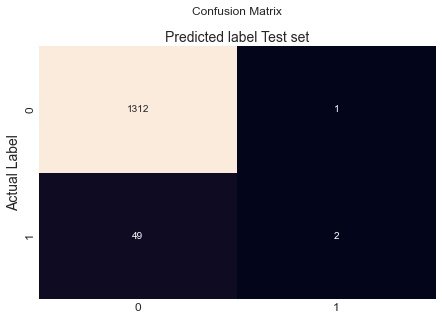

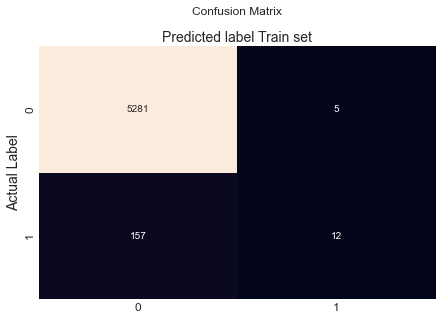

In [247]:
#Plot confusion matrix for test data
import matplotlib.pyplot as plt
import seaborn as sns
import random

labels=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(test_cnf_matrix), annot=True,fmt="g", cbar=False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted label Test set")

#Plot confusion matrix for train data

labels=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(train_cnf_matrix), annot=True,fmt="g", cbar=False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted label Train set")

In [248]:
#Classification report for test data 
predicted_test = regr.predict(X_test_MM)
print(classification_report(y_test, predicted_test)) # classification report for test data

predicted_train = regr.predict(X_train_MM)
print(classification_report(y_train, predicted_train)) # classification report for train data


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.67      0.04      0.07        51

    accuracy                           0.96      1364
   macro avg       0.82      0.52      0.53      1364
weighted avg       0.95      0.96      0.95      1364

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5286
           1       0.71      0.07      0.13       169

    accuracy                           0.97      5455
   macro avg       0.84      0.54      0.56      5455
weighted avg       0.96      0.97      0.96      5455



Precion and Recall

In [249]:
# Accuracy of the positive predictions; this is called the precision of the classifier { TP /[TP+FP]}
# Precision is typically used along with another metric named recall (sensitivity or true positive rate) { TP /[TP+FN]}
from sklearn.metrics import precision_score, recall_score

print("Precision of predictions vs actual on test data is ", round(precision_score(y_test, predicted_test),2)) # test data precision
print("Recall on test data is ", round(recall_score(y_test, predicted_test),2)) # test data recall

print("Precision of predictions vs actual on train data is ", round(precision_score(y_train, predicted_train),2)) #train data precision
print("Recall on train data is ", round(recall_score(y_train, predicted_train),2)) #train data recall

Precision of predictions vs actual on test data is  0.67
Recall on test data is  0.04
Precision of predictions vs actual on train data is  0.71
Recall on train data is  0.07


Roc Curve

In [250]:
# predict probabilities train set
pred_prob_train = regr.predict_proba(X_train_MM)
pred_prob_test= regr.predict_proba(X_test_MM)


In [251]:
# To plot the ROC curve, you first use the roc_curve() function to compute the TPR and FPR for various threshold values:

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, pred_prob_train[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_prob_test[:,1])


Saving figure roc_curve_plot


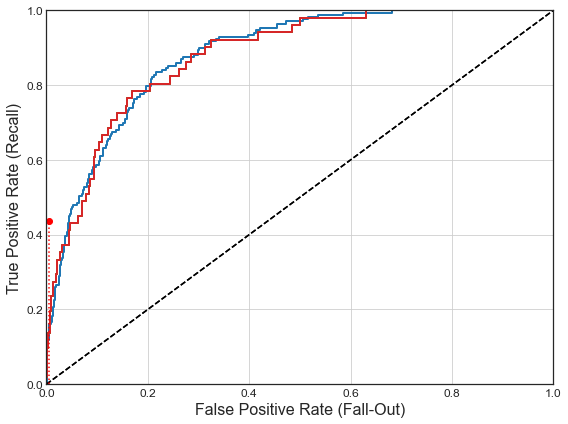

In [252]:
# Then you can plot the FPR against the TPR using Matplotlib
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot(fpr1, tpr1, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                           

plt.figure(figsize=(8, 6))                        
plot_roc_curve(fpr, tpr)
plot_roc_curve(fpr1, tpr1)

plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
plt.plot([4.837e-3], [0.4368], "ro")               
save_fig("roc_curve_plot")                         
plt.show()

In [253]:
# tradeoff: the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the 
# ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left 
# corner). One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC
# equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute 
# the ROC AUC

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, pred_prob_train[:,1]))
print(roc_auc_score(y_test, pred_prob_test[:,1]))


0.8820508342904222
0.8787240715021728


Precision/Recall Curve

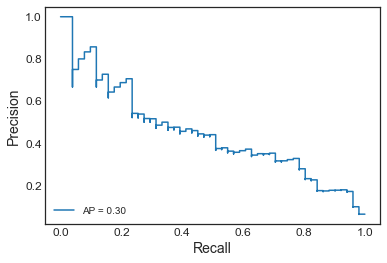

In [254]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

y_pred_prob = regr.predict_proba(X_test_MM)
y_pred_prob = y_pred_prob[:,1]

ap = average_precision_score(y_test, y_pred_prob)
prd = PrecisionRecallDisplay(precision, recall, average_precision=ap)
prd.plot()

In [255]:
#Average precision score
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_pred_prob)

0.3013370714405575

F1 Score

In [256]:
from sklearn.metrics import f1_score
print("F1 score for predictions on test set is ", round(f1_score(y_test, predicted_test),2)) # f1 score for test 
print("F1 score for predictions on train set is ", round(f1_score(y_train, predicted_train),2)) # f1 score for train


F1 score for predictions on test set is  0.07
F1 score for predictions on train set is  0.13


# Support Vector Machines

In [257]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline


from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

#pca = RandomizedPCA(n_components=95, whiten=True, random_state=42)
svc = SVC(class_weight='balanced',probability=True)
model = make_pipeline(svc)


Perform Gridsearch to get best parameters

In [258]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
param_grid = {'svc__C': [1],
              'svc__gamma': [0.1],
              'svc__kernel': ['rbf']
              }
grid = GridSearchCV(model, param_grid,cv=5)

%time grid.fit(X_train_MM, y_train)


CPU times: user 27.7 s, sys: 321 ms, total: 28 s
Wall time: 31.4 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('svc',
                                        SVC(class_weight='balanced',
                                            probability=True))]),
             param_grid={'svc__C': [1], 'svc__gamma': [0.1],
                         'svc__kernel': ['rbf']})

Best parameters

In [259]:
grid.best_params_

#Got below as best parameters after performing hyperparameter tuning using gridsearch and trying out several different kernels,gamma and regularization parameters 
#{'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


{'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

Accuracy

In [260]:
accuracy = grid.score(X_test, y_test)
print("Test Accuracy:", accuracy)

accuracy = grid.score(X_train, y_train)
print("Train Accuracy:", accuracy)

Test Accuracy: 0.8284457478005866
Train Accuracy: 0.8344637946837764


Classification Report

In [261]:
#Classification report for test data 
predicted_test = grid.predict(X_test_MM)
print(classification_report(y_test, predicted_test)) # classification report for test data

#Classification report for train data 
predicted_train = grid.predict(X_train_MM)
print(classification_report(y_train, predicted_train)) # classification report for train data



              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1313
           1       0.17      0.71      0.27        51

    accuracy                           0.86      1364
   macro avg       0.58      0.78      0.59      1364
weighted avg       0.96      0.86      0.90      1364

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      5286
           1       0.14      0.68      0.23       169

    accuracy                           0.86      5455
   macro avg       0.56      0.77      0.57      5455
weighted avg       0.96      0.86      0.90      5455



Confusion Matrix

Text(0.5, 257.44, 'Predicted label Train set')

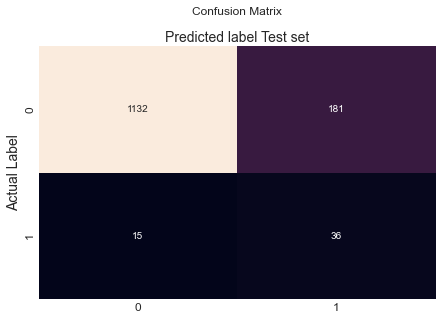

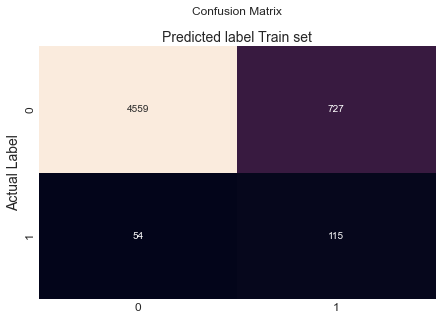

In [262]:
#Plot confusion matrix for test data
import matplotlib.pyplot as plt
import seaborn as sns
import random

test_cnf_matrix = confusion_matrix(y_test, predicted_test) # confusion matrix for test data
train_cnf_matrix = confusion_matrix(y_train, predicted_train) #confusion matrix for train data

labels=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(test_cnf_matrix), annot=True,fmt="g", cbar=False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted label Test set")

#Plot confusion matrix for train data

labels=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(train_cnf_matrix), annot=True,fmt="g", cbar=False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted label Train set")

In [263]:
# Accuracy of the positive predictions; this is called the precision of the classifier { TP /[TP+FP]}
# Precision is typically used along with another metric named recall (sensitivity or true positive rate) { TP /[TP+FN]}
from sklearn.metrics import precision_score, recall_score

print("Precision of predictions vs actual on test data is ", round(precision_score(y_test, predicted_test),2)) # test data precision
print("Recall on test data is ", round(recall_score(y_test, predicted_test),2)) # test data recall

print("Precision of predictions vs actual on train data is ", round(precision_score(y_train, predicted_train),2)) #train data precision
print("Recall on train data is ", round(recall_score(y_train, predicted_train),2)) #train data recall

Precision of predictions vs actual on test data is  0.17
Recall on test data is  0.71
Precision of predictions vs actual on train data is  0.14
Recall on train data is  0.68


Roc Curve

In [264]:
# predict probabilities train set
pred_prob_train = grid.predict_proba(X_train_MM)
pred_prob_test= grid.predict_proba(X_test_MM)


In [265]:
# To plot the ROC curve, you first use the roc_curve() function to compute the TPR and FPR for various threshold values:

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, pred_prob_train[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_prob_test[:,1])


Saving figure roc_curve_plot


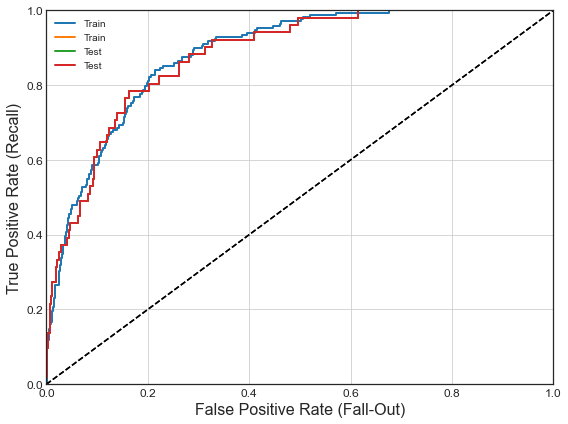

In [266]:
# Then you can plot the FPR against the TPR using Matplotlib
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot(fpr1, tpr1, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)            
                                 # Not shown

plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr,'Train')
plot_roc_curve(fpr1, tpr1,'Test')

#plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
#plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
#plt.plot([4.837e-3], [0.4368], "ro")               
save_fig("roc_curve_plot")                         
plt.legend()  
plt.show()

In [267]:
# tradeoff: the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the 
# ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left 
# corner). One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC
# equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute 
# the ROC AUC

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, pred_prob_train[:,1]))
print(roc_auc_score(y_test, pred_prob_test[:,1]))


0.8844900115746182
0.8800531636874095


Precision/Recall Curve

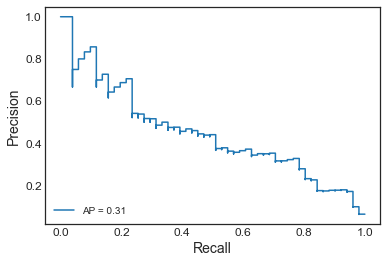

In [268]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

y_pred_prob = grid.predict_proba(X_test_MM)
y_pred_prob = y_pred_prob[:,1]

ap = average_precision_score(y_test, y_pred_prob)
prd = PrecisionRecallDisplay(precision, recall, average_precision=ap)
prd.plot()

In [269]:
#Average precision score
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_pred_prob)

0.3056516161154918

F1 Score

In [270]:
from sklearn.metrics import f1_score
print(f1_score(y_test, predicted_test)) # f1 score for test 
print(f1_score(y_train, predicted_train)) # f1 score for train

0.26865671641791045
0.22749752720079133


# Naive Bayes Theorem

In [271]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
#Used Scaled train set X_train_MM for training
gnb.fit(X_train_MM, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train_MM, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test_MM, y_test)))

Accuracy of GNB classifier on training set: 0.95
Accuracy of GNB classifier on test set: 0.95


Classification Report

In [272]:
#Classification report for test data 
predicted_test = gnb.predict(X_test_MM)
print(classification_report(y_test, predicted_test)) # classification report for test data

#Classification report for train data 
predicted_train = gnb.predict(X_train_MM)
print(classification_report(y_train, predicted_train)) # classification report for train data



              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1313
           1       0.34      0.39      0.37        51

    accuracy                           0.95      1364
   macro avg       0.66      0.68      0.67      1364
weighted avg       0.95      0.95      0.95      1364

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5286
           1       0.29      0.39      0.33       169

    accuracy                           0.95      5455
   macro avg       0.63      0.68      0.65      5455
weighted avg       0.96      0.95      0.95      5455



Confusion Matrix

Text(0.5, 257.44, 'Predicted label Train set')

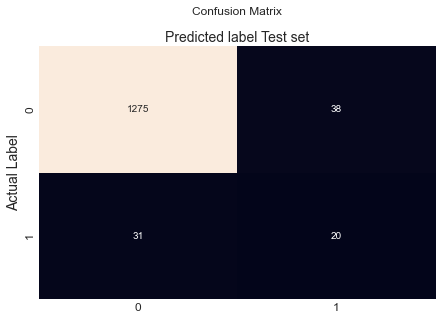

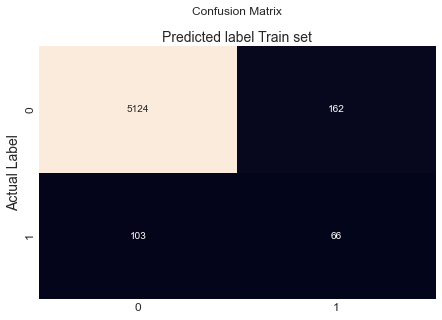

In [273]:
#Plot confusion matrix for test data
import matplotlib.pyplot as plt
import seaborn as sns
import random

test_cnf_matrix = confusion_matrix(y_test, predicted_test) # confusion matrix for test data
train_cnf_matrix = confusion_matrix(y_train, predicted_train) #confusion matrix for train data

labels=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(test_cnf_matrix), annot=True,fmt="g", cbar=False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted label Test set")

#Plot confusion matrix for train data

labels=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(train_cnf_matrix), annot=True,fmt="g", cbar=False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted label Train set")

In [274]:
# Accuracy of the positive predictions; this is called the precision of the classifier { TP /[TP+FP]}
# Precision is typically used along with another metric named recall (sensitivity or true positive rate) { TP /[TP+FN]}
from sklearn.metrics import precision_score, recall_score

print("Precision of predictions vs actual on test data is ", round(precision_score(y_test, predicted_test),2)) # test data precision
print("Recall on test data is ", round(recall_score(y_test, predicted_test),2)) # test data recall

print("Precision of predictions vs actual on train data is ", round(precision_score(y_train, predicted_train),2)) #train data precision
print("Recall on train data is ", round(recall_score(y_train, predicted_train),2)) #train data recall

Precision of predictions vs actual on test data is  0.34
Recall on test data is  0.39
Precision of predictions vs actual on train data is  0.29
Recall on train data is  0.39


Roc Curve

In [275]:
# predict probabilities train set
pred_prob_train = gnb.predict_proba(X_train_MM) #Use Scaled Train set
pred_prob_test= gnb.predict_proba(X_test_MM) #Use Scaled Test set

In [276]:
# To plot the ROC curve, you first use the roc_curve() function to compute the TPR and FPR for various threshold values:

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, pred_prob_train[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_prob_test[:,1])


Saving figure roc_curve_plot


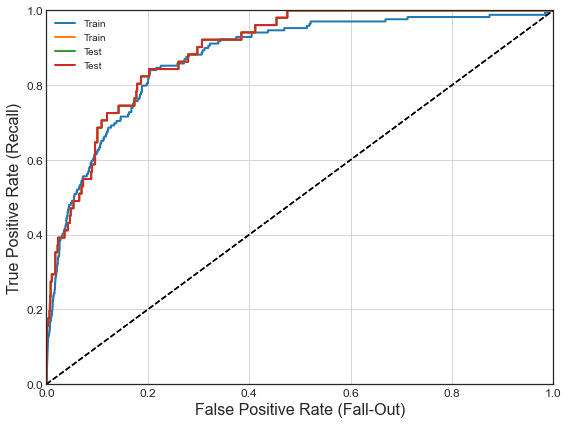

In [277]:
# Then you can plot the FPR against the TPR using Matplotlib
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot(fpr1, tpr1, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)            
                                 # Not shown

plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr,'Train')
plot_roc_curve(fpr1, tpr1,'Test')

#plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
#plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
#plt.plot([4.837e-3], [0.4368], "ro")               
save_fig("roc_curve_plot")                         
plt.legend()  
plt.show()

In [278]:
# tradeoff: the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the 
# ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left 
# corner). One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC
# equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute 
# the ROC AUC

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, pred_prob_train[:,1]))
print(roc_auc_score(y_test, pred_prob_test[:,1]))


0.8765926294084856
0.8938070277615996


Precision/Recall Curve

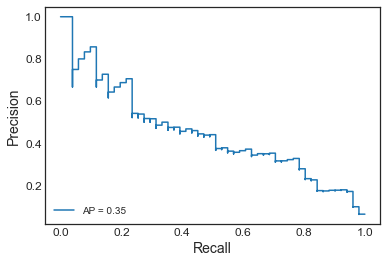

In [279]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

y_pred_prob = gnb.predict_proba(X_test_MM)
y_pred_prob = y_pred_prob[:,1]

ap = average_precision_score(y_test, y_pred_prob)
prd = PrecisionRecallDisplay(precision, recall, average_precision=ap)
prd.plot()

In [280]:
#Average precision score
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_pred_prob)

0.35186293019052944

F1 Score

In [281]:
from sklearn.metrics import f1_score
print(f1_score(y_test, predicted_test)) # f1 score for test 
print(f1_score(y_train, predicted_train)) # f1 score for train

0.3669724770642202
0.3324937027707809


# Model Evaluation

In Summary, SVM and Naive Bayes  seems to provide a better precision and recall compared to logistic regression. Further enhancement can be done by looking at feature importance scores, shap values for each feature to make a determination regarding which features are important vs not relevant. The sample set seems to be imbalanced with 6,599 records in class 0 and only 220 records in class 1. Using a imbalanced learn packages like SMOTE may help balancing the sample set by creating synthetic datasets. Overall, SVM and Naive Bayes seems to be the best models for this type of dataset.


SVM on validation set
Precision = 0.17
Recall = 0.71
F1 Score = 0.26

Naive Bayes on validation set
Precision = 0.34
Recall = 0.39
F1 Score = 0.36

Logistic Regression on validation set
Precision = 0.67
Recall = 0.04
F1 Score = 0.07
